In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,6)

import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

## Types of Stationary Behavior in a Time Series

- **Stationary data means that the statistical properties of the particular process do not vary with time.There are five forms of stationary time-series data.**
    1. **Strict or strong stationary:** the distribution is the same through time.
    2. **First-order stationary:** This series has constant means that never change with time. Other statistical properties may be changing, such as variance.
    3. **Weak (second-order) stationary:** In weak stationery data, mean, variance, and covariance are constant throughout the time series. It is also known as covariance/mean stationarity.
    4. **Trend stationary:** This series varies around the trends (the statistical property mean is varied). These trends may be linear or quadric.
    5. **Difference stationary:** This type of series has one or more differences when the data is in a time series.
> So, if data exhibits the behaviors of constant mean, variance, and
autocorrelation, then it is said to be stationary. It is mandatory to convert your data into a stationery format to train a time-series forecasting model.

## Making Data Stationery
> When time-series data is nonstationary, it means it has trends and seasonality patterns that should be removed. By making data stationary, our data will have a constant mean and variance, and most of the statistical concepts can be applied. To check whether a time series is stationary or not, we can use three types of methods.<br>
    1. Plots<br>
    2. Summary statistics<br>
    3. Statistics tests (Unit Root Test)<br>
    > **Dickey-Fuller (DF) test**: This is based on linear regression. Serial correlation is a big issue of this method.<br>
    **Augmented Dickey-Fuller test:** This solves the serial correlation problem of a DF test and handles big and complex models. This method is widely used.

#### The concept behind the unit root stationary test is that the statistical property of a given time series is not constant with time.

### Note: 
- Here are some definitions you should understand:
    - **ACF:** The correlation of a variable with its lagged values. 
    - **PACF:** The correlation of a variable with its lagged values, but after removing the effects of in-between time lags.
    - **Correlograms:** The plots of ACF and PACF against the lag length. This can give you an idea about the relation of autocorrelation between variables.
    
## AR(p),  ARMA (p,q), ARIMA(p,d,q), SARIMA(p,d,q)(P,D,Q)

1. **An autoregression model (AR)** predicts future behavior based on its past data. It is when data is correlated with a consecutive sequence of a time series and the values before and after the sequence. The autoregressive model uses only past behavior data to forecast the value.
2. **A moving average (MA)** is a method to get all the trends in a time series. It is the average of any subcategory of numbers. It is utilized for long-term forecasting trends. Basically, a moving average forecasts future points by using an average of several past data points.
3. **ARMA** uses information obtained from the variable itself to forecast its trend, and the variable is regressed on its own past values
4. **Autoregressive integrated moving average—also called ARIMA(p,d,q)**—is a forecasting equation that can make time series stationary with the help of differencing and log techniques when required. A time series that should be differentiated to be stationary is an integrated (d) (I) series. Lags of the stationary series are classified as autoregressive (p), which is designated in (AR) terms. Lags of the forecast errors are classified as moving averages (q), which are identified in (MA) terms.
5. 

In [2]:
from pmdarima import auto_arima,plot_acf,plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from sklearn import metrics

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/Apress/hands-on-time-series-analylsis-python/master/Data/FB.csv',
                parse_dates=True, index_col=0)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-08,76.180000,77.250000,75.400002,76.519997,76.519997,25733900
2014-12-09,75.199997,76.930000,74.779999,76.839996,76.839996,25358600
2014-12-10,76.650002,77.550003,76.070000,76.180000,76.180000,32210500
2014-12-11,76.519997,78.519997,76.480003,77.730003,77.730003,33462100
2014-12-12,77.160004,78.879997,77.019997,77.830002,77.830002,28091600


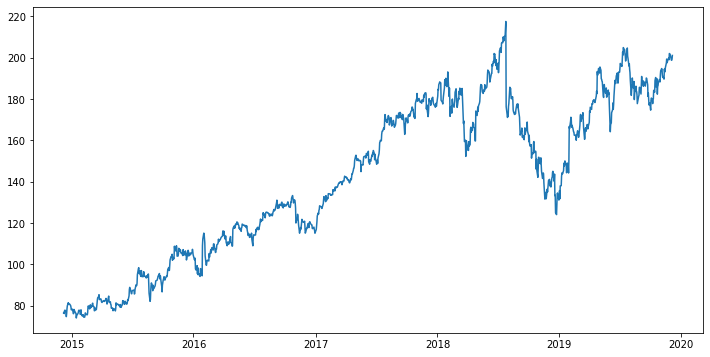

In [6]:
plt.plot(df['Close'])
plt.show()

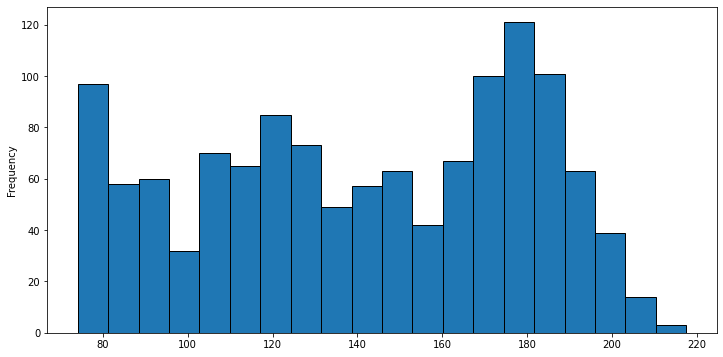

In [8]:
df.Close.plot.hist(bins=20, ec='k')
plt.show()

<AxesSubplot:ylabel='Density'>

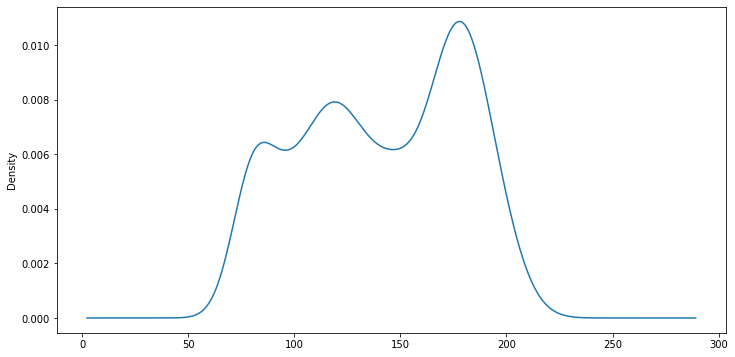

In [9]:
df.Close.plot.kde()
plt.show()

In [4]:
def adftest(series, lag):
    adf = adfuller(x=series, maxlag=lag, autolag='AIC')
    if adf[1]<=0.5:
        print("Reject Null Hypothesis!")
        print("Data is Stationary")
    else:
        print("Fail to reject the Null Hypothesis!")
        print("Data is Non-stationary")

In [14]:
## Stationarity test of the closing price
adftest(df.Close, lag=40)

Fail to reject the Null Hypothesis!
Data is Non-stationary


In [15]:
X = df[['Close']]

train, test = X[:-30], X[-30:]

In [16]:
model = auto_arima(train, start_p=1, start_q=1, max_p=7, max_q=7, 
                   seasonal=False, trace=True, error_action='ignore', 
                   suppress_warnings=True, stepwise=True)

model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5926.792, Time=2.53 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5929.302, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5930.825, Time=0.24 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5930.810, Time=0.33 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5928.648, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5928.521, Time=1.66 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=5930.139, Time=1.49 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=5932.491, Time=0.71 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=5932.541, Time=0.64 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=3.82 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=5927.184, Time=0.48 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 12.177 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1229
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -2959.396
Date:                Tue, 08 Jun 2021   AIC                           5926.792
Time:                        20:34:56   BIC                           5947.245
Sample:                             0   HQIC                          5934.488
                               - 1229                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0122      0.012      1.046      0.296      -0.011       0.035
ar.L1          0.8631      0.087      9.909      0.000       0.692       1.034
ma.L1         -0.8999      0.076    -11.854      0.000      -1.049      -0.751
sigma2         7.2569      0.083     87.805      0.000       7.095       7.419
===================================================================================
Ljung-Box (L1) (Q):                   0.17   Jarque-Bera (JB):            112080.84
Prob(Q):                              0.68   Prob(JB):                         0.00
Heteroskedasticity (H):               4.99   Skew:                            -2.83
Prob(H) (two-sided):                  0.00   Kurtosis:                        49.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [18]:
preds, conf_int = model.predict(30, return_conf_int=True)

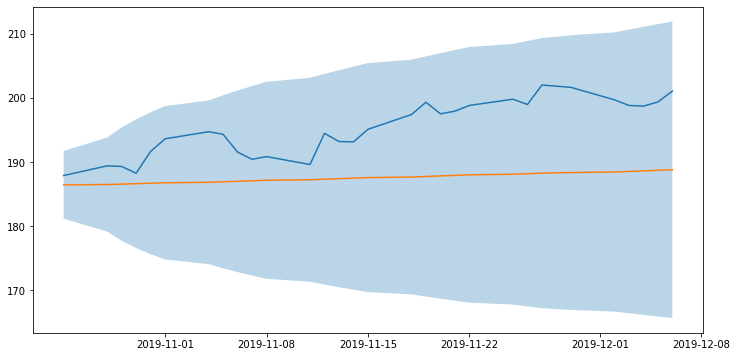

In [23]:
plt.plot(test, label='Test')
plt.plot(test.index, preds, label='Prediction')
plt.fill_between(test.index, conf_int[:,0], conf_int[:,1], alpha=0.3)
plt.show()

In [25]:
print("RMSE:",np.sqrt(metrics.mean_squared_error(test, preds)))

RMSE: 8.54480403847875


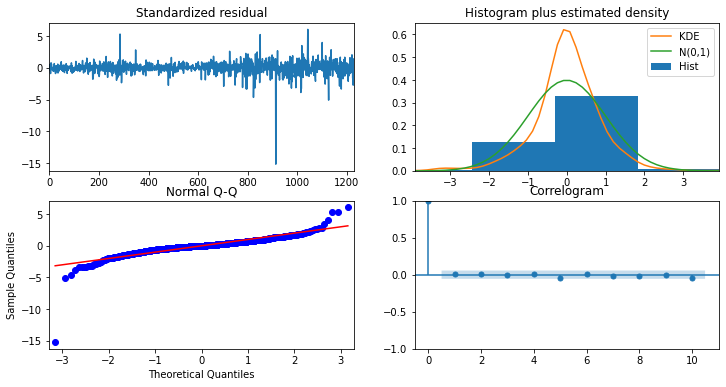

In [29]:
model.plot_diagnostics();

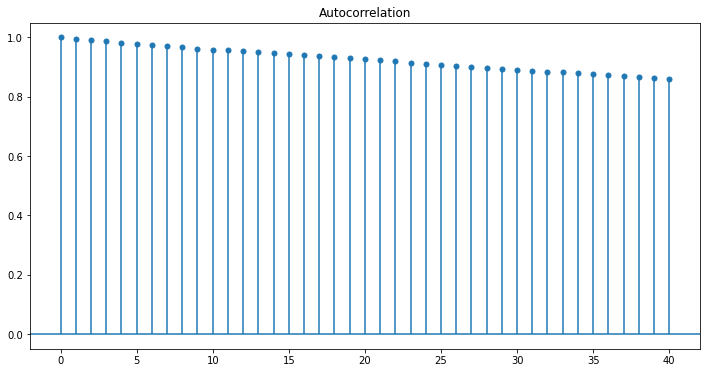

In [30]:
plot_acf(df.Close, lags=40)

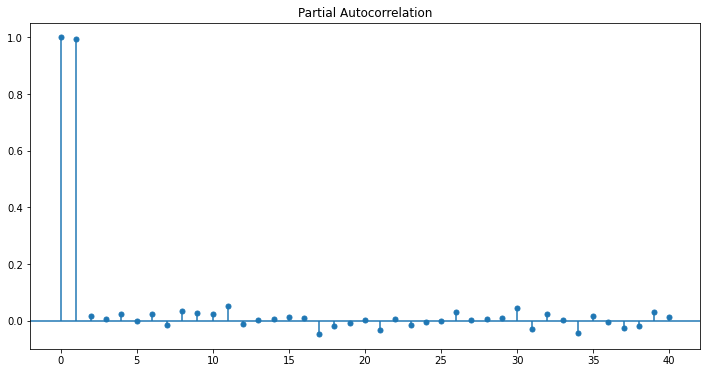

In [31]:
plot_pacf(df.Close, lags=40)

## SARIMA

In [35]:
model2 = auto_arima(train, start_p=1, start_q=1, max_p=7, max_q=7, 
                    seasonal=True, start_P=1, start_Q=1, max_P=7, max_D=7, max_Q=7, 
                    m=30, d=None, D=None, trace=True, error_action='ignore', 
                    suppress_warnings=True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,0,1)[30] intercept   : AIC=inf, Time=29.74 sec
 ARIMA(0,1,0)(0,0,0)[30] intercept   : AIC=5929.302, Time=0.13 sec
 ARIMA(1,1,0)(1,0,0)[30] intercept   : AIC=5928.920, Time=3.46 sec
 ARIMA(0,1,1)(0,0,1)[30] intercept   : AIC=5929.018, Time=3.40 sec
 ARIMA(0,1,0)(0,0,0)[30]             : AIC=5928.648, Time=0.11 sec
 ARIMA(0,1,0)(1,0,0)[30] intercept   : AIC=5927.161, Time=1.93 sec
 ARIMA(0,1,0)(2,0,0)[30] intercept   : AIC=5928.900, Time=8.90 sec
 ARIMA(0,1,0)(1,0,1)[30] intercept   : AIC=inf, Time=10.15 sec
 ARIMA(0,1,0)(0,0,1)[30] intercept   : AIC=5927.271, Time=2.41 sec
 ARIMA(0,1,0)(2,0,1)[30] intercept   : AIC=inf, Time=34.10 sec
 ARIMA(0,1,1)(1,0,0)[30] intercept   : AIC=5928.912, Time=2.59 sec
 ARIMA(1,1,1)(1,0,0)[30] intercept   : AIC=5924.904, Time=13.46 sec
 ARIMA(1,1,1)(0,0,0)[30] intercept   : AIC=5926.792, Time=1.61 sec
 ARIMA(1,1,1)(2,0,0)[30] intercept   : AIC=5926.699, Time=41.92 sec
 ARIMA(1,1,1)(0,0,1)[30] inte

In [36]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                 1229
Model:             SARIMAX(1, 1, 1)x(1, 0, [], 30)   Log Likelihood               -2957.452
Date:                             Tue, 08 Jun 2021   AIC                           5924.904
Time:                                     21:03:16   BIC                           5950.470
Sample:                                          0   HQIC                          5934.523
                                            - 1229                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0098      0.010      1.015      0.310      -0.009       0.029
ar.L1          0.8827      0.076     11.563      0.000       0.733       1.032
ma.L1         -0.9163      0.066    -13.970      0.000      -1.045      -0.788
ar.S.L30       0.0571      0.028      2.056      0.040       0.003       0.111
sigma2         7.2337      0.083     87.561      0.000       7.072       7.396
===================================================================================
Ljung-Box (L1) (Q):                   0.25   Jarque-Bera (JB):            113436.83
Prob(Q):                              0.62   Prob(JB):                         0.00
Heteroskedasticity (H):               4.95   Skew:                            -2.83
Prob(H) (two-sided):                  0.00   Kurtosis:                        49.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

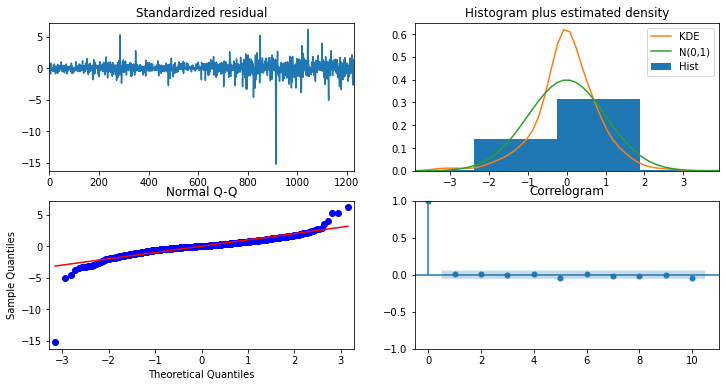

In [38]:
model2.plot_diagnostics();

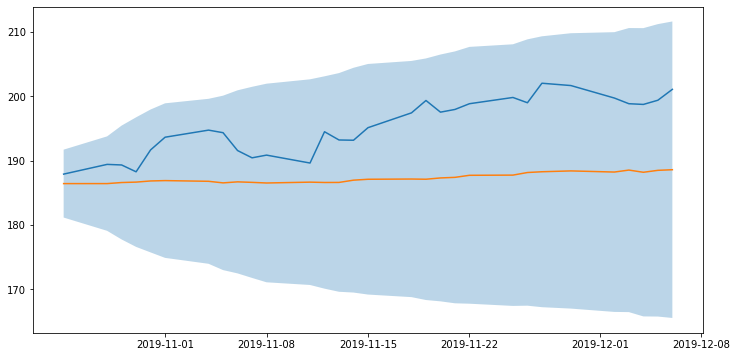

In [39]:
preds, conf_int = model2.predict(30, return_conf_int=True)
plt.plot(test, label='Test')
plt.plot(test.index, preds, label='Prediction')
plt.fill_between(test.index, conf_int[:,0], conf_int[:,1], alpha=0.3)
plt.show()

## SARIMA X

The SARIMAX model is a SARIMA model with external influencing variables, called SARIMAX (p, d, q) X(P,D,Q)m(X), where X is the vector of exogenous variables. The exogenous variables perhaps modeled by the multilinear regression equation.

In [5]:
X = df[['Close']]
exoX = df[['Open']]

In [6]:
adftest(exoX,lag=40)

Fail to reject the Null Hypothesis!
Data is Non-stationary


In [7]:
X_train, X_test = X[:-30], X[-30:]
exoX_train, exoX_test = exoX[:-30], exoX[-30:]

In [8]:
sarimaX = auto_arima(X_train, exogenous=exoX_train, start_p=1, start_q=1, max_p=7, max_q=7, 
                     seasonal=True, start_P=1,start_Q=1,
                     max_P=7,max_D=7,max_Q=7,m=30, 
                     d=None,D=None,trace=True,error_action='ignore',
                     suppress_warnings=True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,0,1)[30] intercept   : AIC=5152.144, Time=17.37 sec
 ARIMA(0,0,0)(0,0,0)[30] intercept   : AIC=5178.246, Time=0.45 sec
 ARIMA(1,0,0)(1,0,0)[30] intercept   : AIC=5152.049, Time=7.00 sec
 ARIMA(0,0,1)(0,0,1)[30] intercept   : AIC=5150.023, Time=8.21 sec
 ARIMA(0,0,0)(0,0,0)[30]             : AIC=5176.629, Time=0.65 sec
 ARIMA(0,0,1)(0,0,0)[30] intercept   : AIC=5155.602, Time=0.61 sec
 ARIMA(0,0,1)(1,0,1)[30] intercept   : AIC=5151.988, Time=16.40 sec
 ARIMA(0,0,1)(0,0,2)[30] intercept   : AIC=5152.058, Time=13.52 sec
 ARIMA(0,0,1)(1,0,0)[30] intercept   : AIC=5150.243, Time=3.04 sec
 ARIMA(0,0,1)(1,0,2)[30] intercept   : AIC=5153.896, Time=45.51 sec
 ARIMA(0,0,0)(0,0,1)[30] intercept   : AIC=5170.967, Time=3.35 sec
 ARIMA(1,0,1)(0,0,1)[30] intercept   : AIC=5149.893, Time=14.77 sec
 ARIMA(1,0,1)(0,0,0)[30] intercept   : AIC=5155.727, Time=0.73 sec
 ARIMA(1,0,1)(0,0,2)[30] intercept   : AIC=5152.047, Time=51.40 sec
 ARIMA(1,0,1)

In [9]:
sarimaX.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 1229
Model:             SARIMAX(0, 0, 1)x(0, 0, 1, 30)   Log Likelihood               -2570.056
Date:                            Sat, 19 Jun 2021   AIC                           5148.112
Time:                                    08:09:46   BIC                           5168.568
Sample:                                         0   HQIC                          5155.809
                                           - 1229                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Open           1.0002      0.000   3028.071      0.000       1.000       1.001
ma.L1         -0.1440      0.025     -5.865      0.000      -0.192      -0.096
ma.S.L30       0.0794      0.026      3.048      0.002       0.028       0.131
sigma2         3.8380      0.100     38.229      0.000       3.641       4.035
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):               511.06
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               3.84   Skew:                            -0.43
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

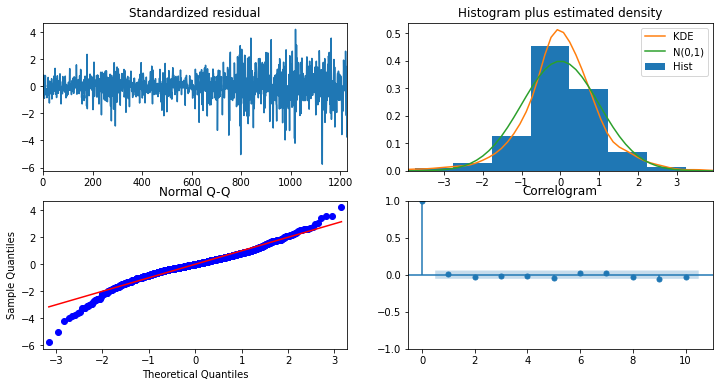

In [11]:
sarimaX.plot_diagnostics();

In [12]:
forecast, conf_int = sarimaX.predict(30,exoX_test,return_conf_int=True)

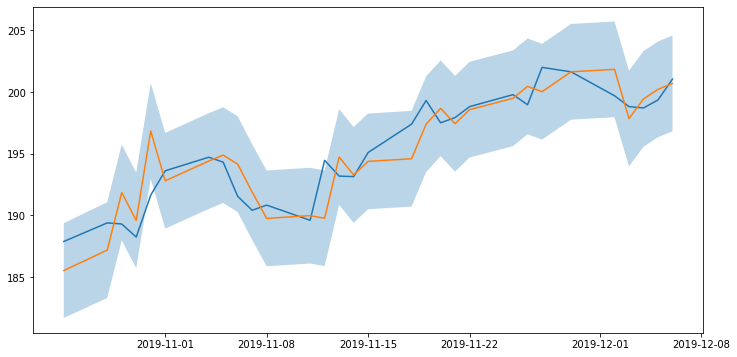

In [14]:
plt.plot(X_test, label='test')
plt.plot(X_test.index, forecast, label='forecast')
plt.fill_between(X_test.index, conf_int[:,0], conf_int[:,1], alpha=0.3)
plt.show()

- We can see that the exogenous variable open is contributing to increased model accuracy, and we notice that m does not have any influence on prediction.

## Vector Autoregression

- Vector autoregression (VAR) is a stochastic process model utilized to seize the linear relation among the multiple variables of time-series data. In other words, it is a multivariate forecasting method utilized when two or more time-series variables have a strong internal relationship with each other. **VAR is a bidirectional model,** while others are unidirectional models. In a unidirectional model, a predictor influences the target, but not vice versa. **In a bidirectional model, variables influence each other.**
- In the VAR model, every single variable is modeled as a linear grouping of its past values and the past values of other variables in the time series. If you have multiple time series, which is determined to each other. So, one variable per equation will be designed.
- The VAR model follows the same rules for the design model as the
univariate time series. It is utilizing the corresponding evaluation matrices such as AIC, BIC, FPE, and HQIC.

In [15]:
from statsmodels.tsa.api import VAR

In [18]:
df = df.loc[(df.index > '2016-01-14') & (df.index <= '2017-01-30')] 
df.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-15,93.980003,96.379997,93.540001,94.970001,94.970001,46132800
2016-01-19,96.529999,97.419998,93.919998,95.260002,95.260002,30998300
2016-01-20,92.830002,95.000000,89.370003,94.349998,94.349998,59051400
2016-01-21,94.910004,95.989998,92.620003,94.160004,94.160004,30518900
2016-01-22,96.410004,98.070000,95.489998,97.940002,97.940002,30495400
2016-01-25,98.720001,99.480003,96.930000,97.010002,97.010002,32482000
2016-01-26,97.760002,97.879997,95.660004,97.339996,97.339996,26877100
2016-01-27,97.790001,97.849998,94.230003,94.449997,94.449997,58699400
2016-01-28,107.199997,110.339996,104.809998,109.110001,109.110001,107475300


<AxesSubplot:xlabel='Date'>

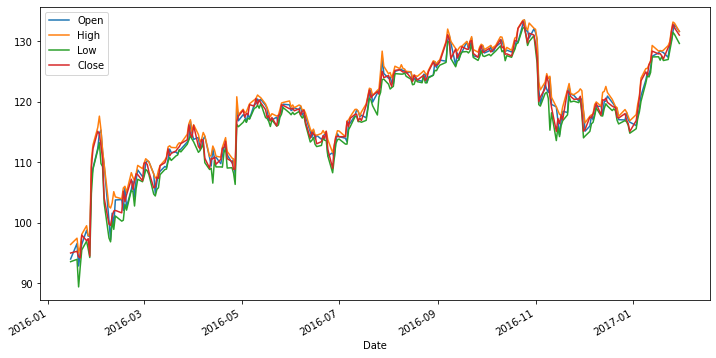

In [19]:
df[['Open', 'High', 'Low', 'Close']].plot()

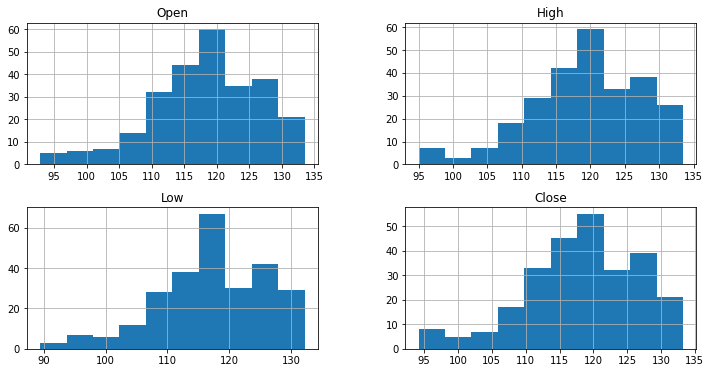

In [21]:
df[['Open', 'High', 'Low', 'Close']].hist()
plt.show()

In [26]:
X = df[['Open', 'High', 'Low', 'Close' ]] 
train, test = X[0:-30], X[-30:]

In [27]:
# Make the data stationary by using Pandas differencing,

train_diff = train.diff() 
train_diff.dropna(inplace = True)

In [28]:
adftest(train_diff.Open, lag=22)

Reject Null Hypothesis!
Data is Stationary


In [29]:
adftest(train_diff.High, lag=22)

Reject Null Hypothesis!
Data is Stationary


In [30]:
adftest(train_diff.Low, lag=22)

Reject Null Hypothesis!
Data is Stationary


In [31]:
adftest(train_diff.Close, lag=22)

Reject Null Hypothesis!
Data is Stationary


<AxesSubplot:xlabel='Date'>

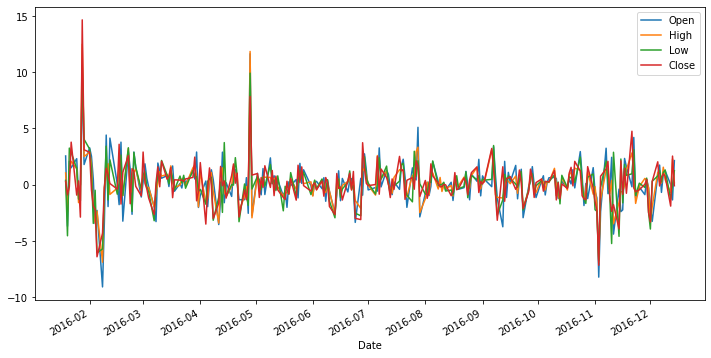

In [32]:
train_diff.plot()

### Cointegration Test
- A cointegration test is the **co-movement among underlying variables over the long run.** This long-run estimation feature distinguishes it from correlation. **Two or more variables are cointegrated if and only if they share common trends.** 
Correlation is simply a measure of the degree of mutual association between two or more variables. We can see that the test says that there is the presence of a long-run relationship between features.

In [33]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

In [36]:
res = coint_johansen(X,-1, 5)

In [37]:
res.trace_stat_crit_vals

array([[37.0339, 40.1749, 46.5716],
       [21.7781, 24.2761, 29.5147],
       [10.4741, 12.3212, 16.364 ],
       [ 2.9762,  4.1296,  6.9406]])

In [38]:
res.trace_stat

array([132.27310324,  65.51036316,  11.69515079,   0.94505127])

In [39]:
res.max_eig_stat_crit_vals

array([[21.837 , 24.1592, 29.0609],
       [15.7175, 17.7961, 22.2519],
       [ 9.4748, 11.2246, 15.0923],
       [ 2.9762,  4.1296,  6.9406]])

In [40]:
res.max_eig_stat

array([66.76274008, 53.81521238, 10.75009951,  0.94505127])